# 서포트 벡터 머신 연습

#####  

서포트 벡터 머신을 공부하고 교재를 따라 와인을 분류하는 classifier 실습을 했었다.

이번에는 서포트 벡터 회귀 모델을 이용하는 연습을 해보려고 한다.

이전에 멜버른 집값을 예측해보는 것을 의사결정나무 regression 연습을 해보았으나 잘 안되긴 했었다.

그것 말고 사이킷런에서 제공하는 보스턴 집값을 데리고 예측을 해보는 것으로 대신하기로 했다.

그러나 버전에 따라 앞으로 없어질 데이터 셋이라고 하여, 안내에 따라 대신할 데이터를 직접 데려온다.

이젠 혼자 부딪힐 때도 되었으니 검색을 최소최소 최~소 최소화하기로 한다.

# Dataset import
## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
raw_bostion = datasets.load_boston()

/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

이러한 데이터의 문제가 있다고 한다. 미래에는 없어진다고 하니 일단은 데려오되 나중에 다른 연습은  캘리포니아 집값 데이터를 데려와보도록 해보겠다.

In [2]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
raw_df.shape

(1012, 11)

In [4]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


알아볼 수 없게 생겨먹었다. target 데이터는 2번 열 즉 2라고 쓰여진 컬럼으로 보인다. 결측값이 있는지 확인해본다.

In [5]:
raw_df.isnull().sum()

0       0
1       0
2       0
3     506
4     506
5     506
6     506
7     506
8     506
9     506
10    506
dtype: int64

타깃 데이터는 1과 0으로 더미 변수 형태로 분류되어있다.

# 피처, 타깃 데이터 지정

In [6]:
X = data
y = target

## 트레이닝, 테스트 데이터 분할

In [7]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

## 데이터 표준화

In [8]:
from sklearn.preprocessing import StandardScaler

# X 트레이닝 데이터 기준으로 Xtn Xte 를 표준화한다.
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

# 서포트 벡터 회귀 모델

## 모델링
### 데이터 학습 (kernel = 'linear')

In [9]:
# 하이퍼파라미터를 보기 위해 일단 데려온다. kernel 은 이전에 실습했던대로 linear 부터 해본다.

from sklearn import svm

In [10]:
from sklearn import svm
clf_svr_lr = svm.SVR(kernel = 'linear')         # SVR 메소드를 이용해 분류 문제에 적용. 분류라면 SVC.
clf_svr_lr.fit(X_tn_std, y_tn)

SVR(kernel='linear')

kernel 종류는 SVC와 마찬가지로 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' 등이 있다.

### 추정계수 및 상수항 확인

결국 선형으로 된 수식을 이용하기 때문에 있을 것이라 생각하여 구해본다.

In [11]:
# 추정계수 확인

print(clf_svr_lr.coef_)

[[-1.15049832  0.85534947  0.02728933  0.38488671 -0.79987923  3.76542984
  -0.77390534 -1.99956251  1.09154612 -1.53001125 -1.56212036  0.94397908
  -2.26623114]]


In [12]:
# 상수항 확인

print(clf_svr_lr.intercept_)

[21.7753086]


분류해야하는 각 클래스별로 존재하는 것을 알 수 있다.

### 데이터 예측

In [13]:
svr_lr_pred = clf_svr_lr.predict(X_te_std)
print(svr_lr_pred)

[24.52947544 20.35423732 26.47676448  9.74009208 21.0378301  18.85874
 18.6263904  20.65306829 16.3571043  18.44120108  1.83859761 14.77921945
 16.8165412   3.39294294 37.49176197 32.0579395  20.41257183 35.48866506
 29.23822418 21.81376385 24.24218256 21.49031908 19.78380253 28.84780636
 20.97310945  2.94925643 17.38496471 17.35019198 35.64837325 19.77476059
 16.76254231 17.03973933 19.33992199 22.38892841 26.47086708 17.24991582
 10.96895118 20.26465974 15.48478266 14.59886084 25.04138918 20.30869651
 21.84126734 12.61710256 23.23369641 23.9581827  19.04474505 22.07247352
 10.34109468 24.10934469 19.83491997 17.98123471 22.25735348 33.80415317
 13.259881   21.24168918 20.21880666 16.07843483  7.97764789 20.30457994
 18.49972329 21.32059799 31.99028068 29.44827917 15.72077258 30.38630497
 18.92222309 20.03005074 17.82815151 22.29090848 21.61667513 23.091445
 28.72776207 28.95497282 23.90385538  4.60649631 36.97482212 23.36941218
 25.72850175 18.54598223 27.40793582 19.86014656 15.1847

## 평가

### R-square, MSE

regression이기 때문에 r제곱값과 MSE로 모형 평가를 하도록 한다.

r제곱값은 높은 값을 가질수록 좋은 성능을 의미하며, MSE는 작을수록 좋은 성능을 의미한다.

In [14]:
from sklearn.metrics import r2_score

r2 = r2_score(y_te, svr_lr_pred)
print(r2)

0.5686388148506821


In [15]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_te, svr_lr_pred)
print(mse)

35.24178412488141


좋은 성능은 아닌 것으로 확인되고 있다.

이번에는 kernel = 'rbf' 로 하여 예측을 해보기로 한다.

# 실험: kernel = 'rbf' (default)

전체 코드로 합한 셀로, 커널을 변경하여 진행해보기로 했다.

In [16]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.metrics import r2_score, mean_squared_error

# raw_df
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


# feature, target data select
X = data
y = target

# training data, test data division
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

# Data standardization for X
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

# SVM Regressor Analyzing
clf_svr_rbf = svm.SVR(kernel = 'rbf')
clf_svr_rbf.fit(X_tn_std, y_tn)

# # w, b(추정계수, 상수항) 출력 : only 'linear'에서만
# print('coef: ', clf_svr_rbf.coef_)
# print('intercept: ', clf_svr_rbf.intercept_)

# predict y
svr_rbf_pred = clf_svr_rbf.predict(X_te_std)
print('pred: ',svr_rbf_pred)

# r-square score
r2 = r2_score(y_te, svr_rbf_pred)
print('r2 score:', r2)

# MSE
mse = mean_squared_error(y_te, svr_rbf_pred)
print('MSE: ', mse)

pred:  [25.11552591 18.9218917  24.49975053 13.37293312 20.94372848 19.44272718
 20.80813628 20.13594679 18.94818956 18.93638023 20.78396854 13.25219783
 14.76024506 13.10287659 27.10999466 30.44442452 21.40174393 31.76106904
 28.85926025 21.42968304 23.84957587 21.52043873 18.91123758 27.94572811
 20.40071213 18.04642576 17.16332442 18.59776569 33.88304617 18.58811301
 15.23207652 17.31310478 19.54779621 21.20809243 25.85119194 20.90186203
 12.03908414 22.2813928  13.93809735 13.24894192 23.4775945  20.13773061
 22.87694552 14.98038217 25.05705592 23.25137952 18.85683562 20.91449993
 16.87507859 23.01042511 20.72783774 19.71440626 21.37960156 29.84633197
 15.22269235 21.0068188  19.88423066 18.34631675 19.53985028 21.59504372
 20.86863203 20.90511802 31.73719895 28.30955215 18.33960229 29.89367263
 16.13817317 20.0411484  13.80402996 21.95356397 20.86701313 22.8551537
 26.72354117 29.89005749 23.04121696 12.45945446 34.94386153 22.74739504
 25.47262778 18.41839862 27.55888042 18.65121

r2 스코어는 거의 그대로이나 MSE는 더욱 증가하면서 나쁜(?) 모델이 되어버렸다. 

다량의 피처를 사용하는 경우 SVM이 오히려 좋지 않은걸까? 어떻게 하면 이들을 더 좋게 만들 수 있을까? 

고민의 답은 우선 다른 옵션들을 사용해보는 것이었다.

# 실험2: kernel = 'poly' 

poly는 여럿을 보통 의미하는데 여기에 어울릴지도 모른다는 생각에 먼저 진행해본다.

In [17]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.metrics import r2_score, mean_squared_error

# raw_df
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]


# feature, target data select
# X = data
# y = target

# training data, test data division
# X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

# Data standardization for X
# std_scale = StandardScaler()
# std_scale.fit(X_tn)
# X_tn_std = std_scale.transform(X_tn)
# X_te_std = std_scale.transform(X_te)

# SVM Regressor Analyzing
clf_svr_poly = svm.SVR(kernel = 'poly')
clf_svr_poly.fit(X_tn_std, y_tn)

# # w, b(추정계수, 상수항) 출력 : only 'linear'에서만
# print('coef: ', clf_svr_rbf.coef_)
# print('intercept: ', clf_svr_rbf.intercept_)

# predict y
svr_poly_pred = clf_svr_poly.predict(X_te_std)
print('pred: ',svr_poly_pred)

# r-square score
r2 = r2_score(y_te, svr_poly_pred)
print('r2 score:', r2)

# MSE
mse = mean_squared_error(y_te, svr_poly_pred)
print('MSE: ', mse)

pred:  [23.69047173 19.97367218 25.52537979 11.88072596 21.75302115 21.51570662
 20.84414913 21.97987054 21.5693947  21.47390908 10.82397144 12.21863918
 15.75917658  5.058035   40.98348413 33.23280535 21.11964747 38.87343076
 24.03474185 22.26234595 22.18887162 21.78393962 21.29762695 24.25537047
 22.97257606 13.0258793  21.00847666 17.88624659 26.94162813 21.48271581
 16.9848521  18.17960244 21.68205683 21.74022597 22.84500341 19.08113729
  9.35097918 24.98616185 15.82260453 15.47205665 23.07804797 22.39164351
 22.73216879 16.42894079 22.91501643 22.43382323 21.61678073 20.86496826
 14.3386672  21.76493488 15.82004626 21.52498482 21.8934869  30.33650979
 17.58387863 21.65094193 21.66339236 21.45653912 15.0710964  22.54031998
 20.67767889 21.78720499 27.04631862 23.56191595 19.16509837 26.27389275
 16.78071622 20.98031758 14.51209201 22.36211179 21.70010812 21.90883439
 26.99520058 25.80289502 21.73447238  6.09855322 26.31793339 21.98687693
 22.8654162  21.5195873  24.04892236 20.1896

실제로 r2스코어는 감소하고 MSE는 오히려 증가하면서 더 나쁜(?) 모델이 되어버렸다. 하... 

# 실험3: kernel = 'sigmoid' 

poly는 여럿을 보통 의미하는데 여기에 어울릴지도 모른다는 생각에 먼저 진행해본다.

In [18]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.metrics import r2_score, mean_squared_error

# raw_df
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]


# feature, target data select
# X = data
# y = target

# training data, test data division
# X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

# Data standardization for X
# std_scale = StandardScaler()
# std_scale.fit(X_tn)
# X_tn_std = std_scale.transform(X_tn)
# X_te_std = std_scale.transform(X_te)

# SVM Regressor Analyzing
clf_svr_sig = svm.SVR(kernel = 'sigmoid')
clf_svr_sig.fit(X_tn_std, y_tn)

# # w, b(추정계수, 상수항) 출력 : only 'linear'에서만
# print('coef: ', clf_svr_rbf.coef_)
# print('intercept: ', clf_svr_rbf.intercept_)

# predict y
svr_sig_pred = clf_svr_sig.predict(X_te_std)
print('pred: ',svr_sig_pred)

# r-square score
r2 = r2_score(y_te, svr_sig_pred)
print('r2 score:', r2)

# MSE
mse = mean_squared_error(y_te, svr_sig_pred)
print('MSE: ', mse)

pred:  [25.21426612 15.57303569 29.47095609 11.29039627 21.67714617 19.86755338
 13.08579288 21.49804511 14.49892597 15.06991619 14.14402877 15.31976434
 15.48698077 11.76152265 38.88022077 25.92490403 14.46627208 27.09060709
 28.91124326 22.17358147 25.03532378 20.78297199 18.88754861 28.6930696
 21.55035338  8.6660176  17.66492054 16.0816438  33.98427561 19.53700589
 13.36482407 14.20235312 22.31863392 24.62111758 27.3434229  15.90789513
 13.3207633  15.53984519 13.50337243 12.75394443 25.49989137 20.75615249
 23.31956207 10.56642216 26.30333379 25.75246665 20.5186916  23.53029465
 11.87506157 24.30182495 20.06470653 16.74279198 22.05851222 29.4764891
 12.85741089 23.13983997 22.68757753 18.61075909 11.29201684 22.19028719
 20.55024852 22.06837617 29.59145205 28.49379537  9.79464672 29.34628814
 16.53220642 22.93579817 15.38799635 22.32247477 21.80068128 23.64704159
 25.42281146 28.51771805 18.11030988 11.93026063 35.00082723 24.01155579
 26.60004287 18.41844581 27.44006058 19.589916

점점 심각해지는 것을 보면서 kernel(추정방식?)의 문제가 아님을 꺠달았음

혼나봐라 데이터야

# 실험4: epsilon = 0.1 -> 0.05

In [19]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.metrics import r2_score, mean_squared_error

# raw_df
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]


# feature, target data select
# X = data
# y = target

# training data, test data division
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

# Data standardization for X
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

# SVM Regressor Analyzing
clf_svr_lr_ep05 = svm.SVR(kernel = 'linear', epsilon = 0.05)
clf_svr_lr_ep05.fit(X_tn_std, y_tn)

# # w, b(추정계수, 상수항) 출력 : only 'linear'에서만
# print('coef: ', clf_svr_rbf.coef_)
# print('intercept: ', clf_svr_rbf.intercept_)

# predict y
svr_lr_ep05_pred = clf_svr_lr_ep05.predict(X_te_std)
print('pred: ',svr_lr_ep05_pred)

# r-square score
r2 = r2_score(y_te, svr_lr_ep05_pred)
print('r2 score:', r2)

# MSE
mse = mean_squared_error(y_te, svr_lr_ep05_pred)
print('MSE: ', mse)

pred:  [24.65577318 20.3861132  26.35074374  9.75495446 21.0473144  18.88964356
 18.79780852 20.67343931 16.46096821 18.38568461  1.5330592  14.76812066
 16.92083893  3.43396592 37.32284328 32.1136178  20.51930348 35.45369243
 29.32908472 21.88691089 24.26241396 21.42802001 19.76281105 28.88287388
 21.03127078  2.9954527  17.33415004 17.3895905  35.54641547 19.74763985
 16.80599321 17.16467534 19.26072505 22.35588413 26.43173196 17.35089073
 10.97439149 20.29578788 15.53742384 14.66010234 25.12153868 20.3744972
 21.92900245 12.6777096  23.2415272  23.87763487 19.03087105 22.06340817
 10.43190977 24.07858647 19.83802481 18.15782216 22.27823746 33.86616832
 13.20988642 21.32964695 20.26677346 16.08633065  7.751596   20.17892143
 18.55618167 21.35047424 32.06755549 29.57478211 15.84813976 30.4429359
 19.01109813 19.95806287 17.81643259 22.401612   21.57036717 23.11948632
 28.76742262 29.00585849 23.96681891  4.68791686 36.93183566 23.3844099
 25.7116913  18.59472174 27.41896043 19.8044806

혼내주려고(?) 엡실론을 반으로 줄였더니 r2 스코어가 올라가고, MSE는 줄어들었다. 하지만 어느정도가 적정값인지는 모른다.

MSE야 데이터의 스케일에 따라 다른게 사실이지만, r2는 1에 가까울 수록 데이터를 잘 설명할 수 있는 설명력이 높아지는 것인데 너무 낮다.

조금더 만져보기로 했다.


# 실험5: epsilon = 0.05 -> 0.02

In [20]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.metrics import r2_score, mean_squared_error

# raw_df
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]


# feature, target data select
# X = data
# y = target

# training data, test data division
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

# Data standardization for X
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

# SVM Regressor Analyzing
clf_svr_lr_ep02 = svm.SVR(kernel = 'linear', epsilon = 0.02)
clf_svr_lr_ep02.fit(X_tn_std, y_tn)

# # w, b(추정계수, 상수항) 출력 : only 'linear'에서만
# print('coef: ', clf_svr_rbf.coef_)
# print('intercept: ', clf_svr_rbf.intercept_)

# predict y
svr_lr_ep02_pred = clf_svr_lr_ep02.predict(X_te_std)
print('pred: ',svr_lr_ep05_pred)

# r-square score
r2 = r2_score(y_te, svr_lr_ep02_pred)
print('r2 score:', r2)

# MSE
mse = mean_squared_error(y_te, svr_lr_ep02_pred)
print('MSE: ', mse)

pred:  [24.65577318 20.3861132  26.35074374  9.75495446 21.0473144  18.88964356
 18.79780852 20.67343931 16.46096821 18.38568461  1.5330592  14.76812066
 16.92083893  3.43396592 37.32284328 32.1136178  20.51930348 35.45369243
 29.32908472 21.88691089 24.26241396 21.42802001 19.76281105 28.88287388
 21.03127078  2.9954527  17.33415004 17.3895905  35.54641547 19.74763985
 16.80599321 17.16467534 19.26072505 22.35588413 26.43173196 17.35089073
 10.97439149 20.29578788 15.53742384 14.66010234 25.12153868 20.3744972
 21.92900245 12.6777096  23.2415272  23.87763487 19.03087105 22.06340817
 10.43190977 24.07858647 19.83802481 18.15782216 22.27823746 33.86616832
 13.20988642 21.32964695 20.26677346 16.08633065  7.751596   20.17892143
 18.55618167 21.35047424 32.06755549 29.57478211 15.84813976 30.4429359
 19.01109813 19.95806287 17.81643259 22.401612   21.57036717 23.11948632
 28.76742262 29.00585849 23.96681891  4.68791686 36.93183566 23.3844099
 25.7116913  18.59472174 27.41896043 19.8044806

r2 스코어가 약간은 올라간 것으로 보이지만, 여전히 문제가 좀 있어보인다.

엡실론이 작아질수록 데이터 자체에 좀 더 fit되는 경향이 있는 것은 사실인 것으로 보인다.

이쯤 되면 처음에 마음에 걸렸던 결측값들이 생각난다. 우선 결측값들이 거의 반이 되는데, 설명력이 50% 대에서 머무르는 것과 관련이 있지 않을까 하는 생각이다.

문제는 데이터 코드 안에서 결측값들을 제거하고 진행하도록 되어있다는 것이다. 


## 실험 5 결과 시각화

다른 곳들에서 이 집값예측을 한 것들을 보아도 MSE값이 30~40 정도가 나오는 것이 보인다.

내 결과를 시각화해보면서 일단락 지으려한다.

X_te_std그대로 변수를 넣으면 모든 피처를 그대로 넣는 것과 같아서 size가 안맞는다.

여기서 드랍되지 않고 사용되었던 0과, 결측치가 많았던 피처중 하나를 넣어보았다.

_참조:https://liz09045.tistory.com/95_

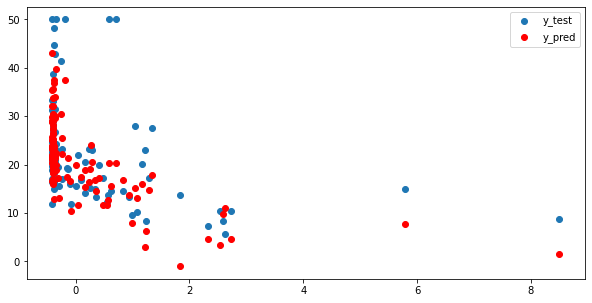

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

#예측값과 실제값의 분포
plt.figure(figsize=(10, 5))                                            #표 크기 지정
plt.scatter(X_te_std[::, 0], y_te, label='y_test')                     #파란점, 실제값
plt.scatter(X_te_std[::, 0], svr_lr_ep02_pred, c='r', label='y_pred')  #빨간점, 예측값
plt.legend(loc='best')                           #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

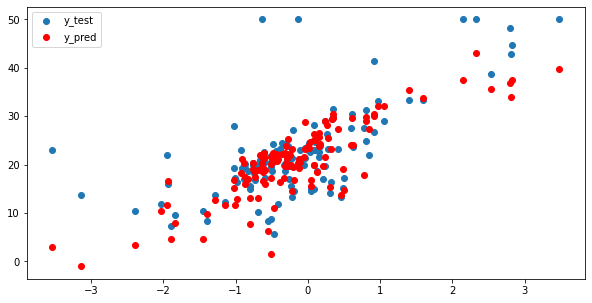

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

#예측값과 실제값의 분포
plt.figure(figsize=(10, 5))                                            #표 크기 지정
plt.scatter(X_te_std[::, 5], y_te, label='y_test')                     #파란점, 실제값
plt.scatter(X_te_std[::, 5], svr_lr_ep02_pred, c='r', label='y_pred')  #빨간점, 예측값
plt.legend(loc='best')                           #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

이렇게 보니 어느 정도는 예측이 되고있다는 생각이 들기는 한다. 하지만 데이터 개수가 안그래도 작은 점과 drop이 데이터셋의 반절이라 아쉽다.

다른 데이터로 또 해보아야겠다.